In [18]:
import sys
sys.path.append('/Users/jp/Desktop/Investment/trading_BOT/macd_long_backtester_1stpkbm/')
from macd_long_backtester_1stpkbm import Macd_long_backtester_1stpkbm
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
pd.set_option('display.max_rows', None)

### 1) Launch optimization

In [20]:
macd_peak_opt_j = Macd_long_backtester_1stpkbm('BTCUSDT')

class version 1.0 is being used


In [21]:
df = pd.read_csv('downtrend_peak_j.csv')
macd_peak_opt_j.opt_results = df

In [4]:
#macd_peak_opt_j.execute_opt(interval_opt=('15m', '30m', '1h') ,start_opt='2019-11-13-00:00', end_opt='2019-12-17-00:00', ema_fast_opt=(2,16,2), ema_slow_opt=(16,40,2), ema_sign_opt=(2, 40, 2), int_for_max='1h', trend_ref='J', type_trend='downtrend_peak_j')

### 2) Extract combinations of max

In [23]:
macd_peak_opt_j.opt_results[macd_peak_opt_j.opt_results.multiple_macd_peak_strategy == macd_peak_opt_j.opt_results.multiple_macd_peak_strategy.max()]

,interval_opt,macd_slow_opt,macd_fast_opt,macd_signal_opt,multiple_hold,ann_log_mean_hold,ann_log_std_hold,sharpe_ratio_hold,multiple_macd_peak_strategy,ann_log_mean_macd_peak,ann_log_std_macd_peak,sharpe_ratio_macd_peak,multiple_macd_peak_strategy_net,ann_log_mean_macd_peak_net,ann_log_std_macd_peak_net,sharpe_ratio_macd_peak_net,trend_ref,start_opt,end_opt
3615,1h,22,4,28,0.806879,-0.097537,0.112425,-0.867577,1.108469,0.046867,0.085073,0.550906,1.06595,0.029066,0.085601,0.339557,J,2019-11-13-00:00,2019-12-17-00:00
4011,1h,28,4,22,0.806879,-0.097537,0.112425,-0.867577,1.108469,0.046867,0.085073,0.550906,1.06595,0.029066,0.085601,0.339557,J,2019-11-13-00:00,2019-12-17-00:00


### 3) Create new class for interval of max and launch backtest for the combinations of max

In [27]:
macd_peak_opt_j_1h = Macd_long_backtester_1stpkbm('BTCUSDT')

class version 1.0 is being used


In [29]:
macd_peak_opt_j_1h.prepare_data(start='2019-11-13-00:00', end='2019-12-17-00:00', interval='1h')

813


In [30]:
macd_peak_opt_j_1h.execute_backtest(start='2019-11-13-00:00', ema_slow=28, ema_fast=4, ema_signal=22)

865
   multiple_hold  ann_log_mean_hold  ann_log_std_hold  sharpe_ratio_hold  \
0       0.806879          -0.097537          0.112425          -0.867577   

   multiple_macd_peak_strategy  ann_log_mean_macd_peak  ann_log_std_macd_peak  \
0                     1.108469                0.046867               0.085073   

   sharpe_ratio_macd_peak  multiple_macd_peak_strategy_net  \
0                0.550906                          1.06595   

   ann_log_mean_macd_peak_net  ann_log_std_macd_peak_net  \
0                    0.029066                   0.085601   

   sharpe_ratio_macd_peak_net  
0                    0.339557  


(0.8068791499454828,
 -0.09753698825557042,
 0.11242455783206927,
 -0.867577245900876,
 1.1084687038907393,
 0.046867236462600916,
 0.08507294530795256,
 0.5509064755304739,
 1.0659499174038154,
 0.02906635303925918,
 0.08560080140808411,
 0.33955702004110166)

### 4) Plot the accumulated max vs hold

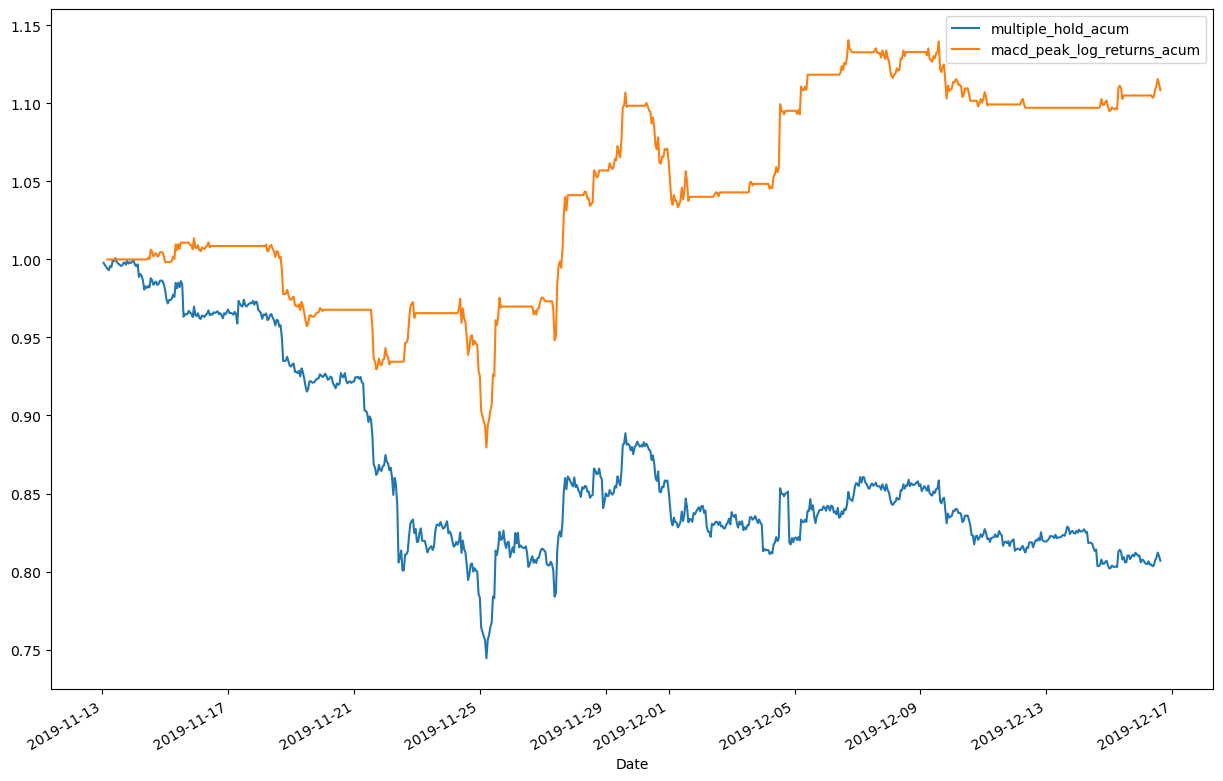

In [32]:
macd_peak_opt_j_1h.data_init.multiple_hold_acum.plot(figsize=(15,10))
macd_peak_opt_j_1h.data_init.macd_peak_log_returns_acum.plot(figsize=(15,10))
plt.legend()

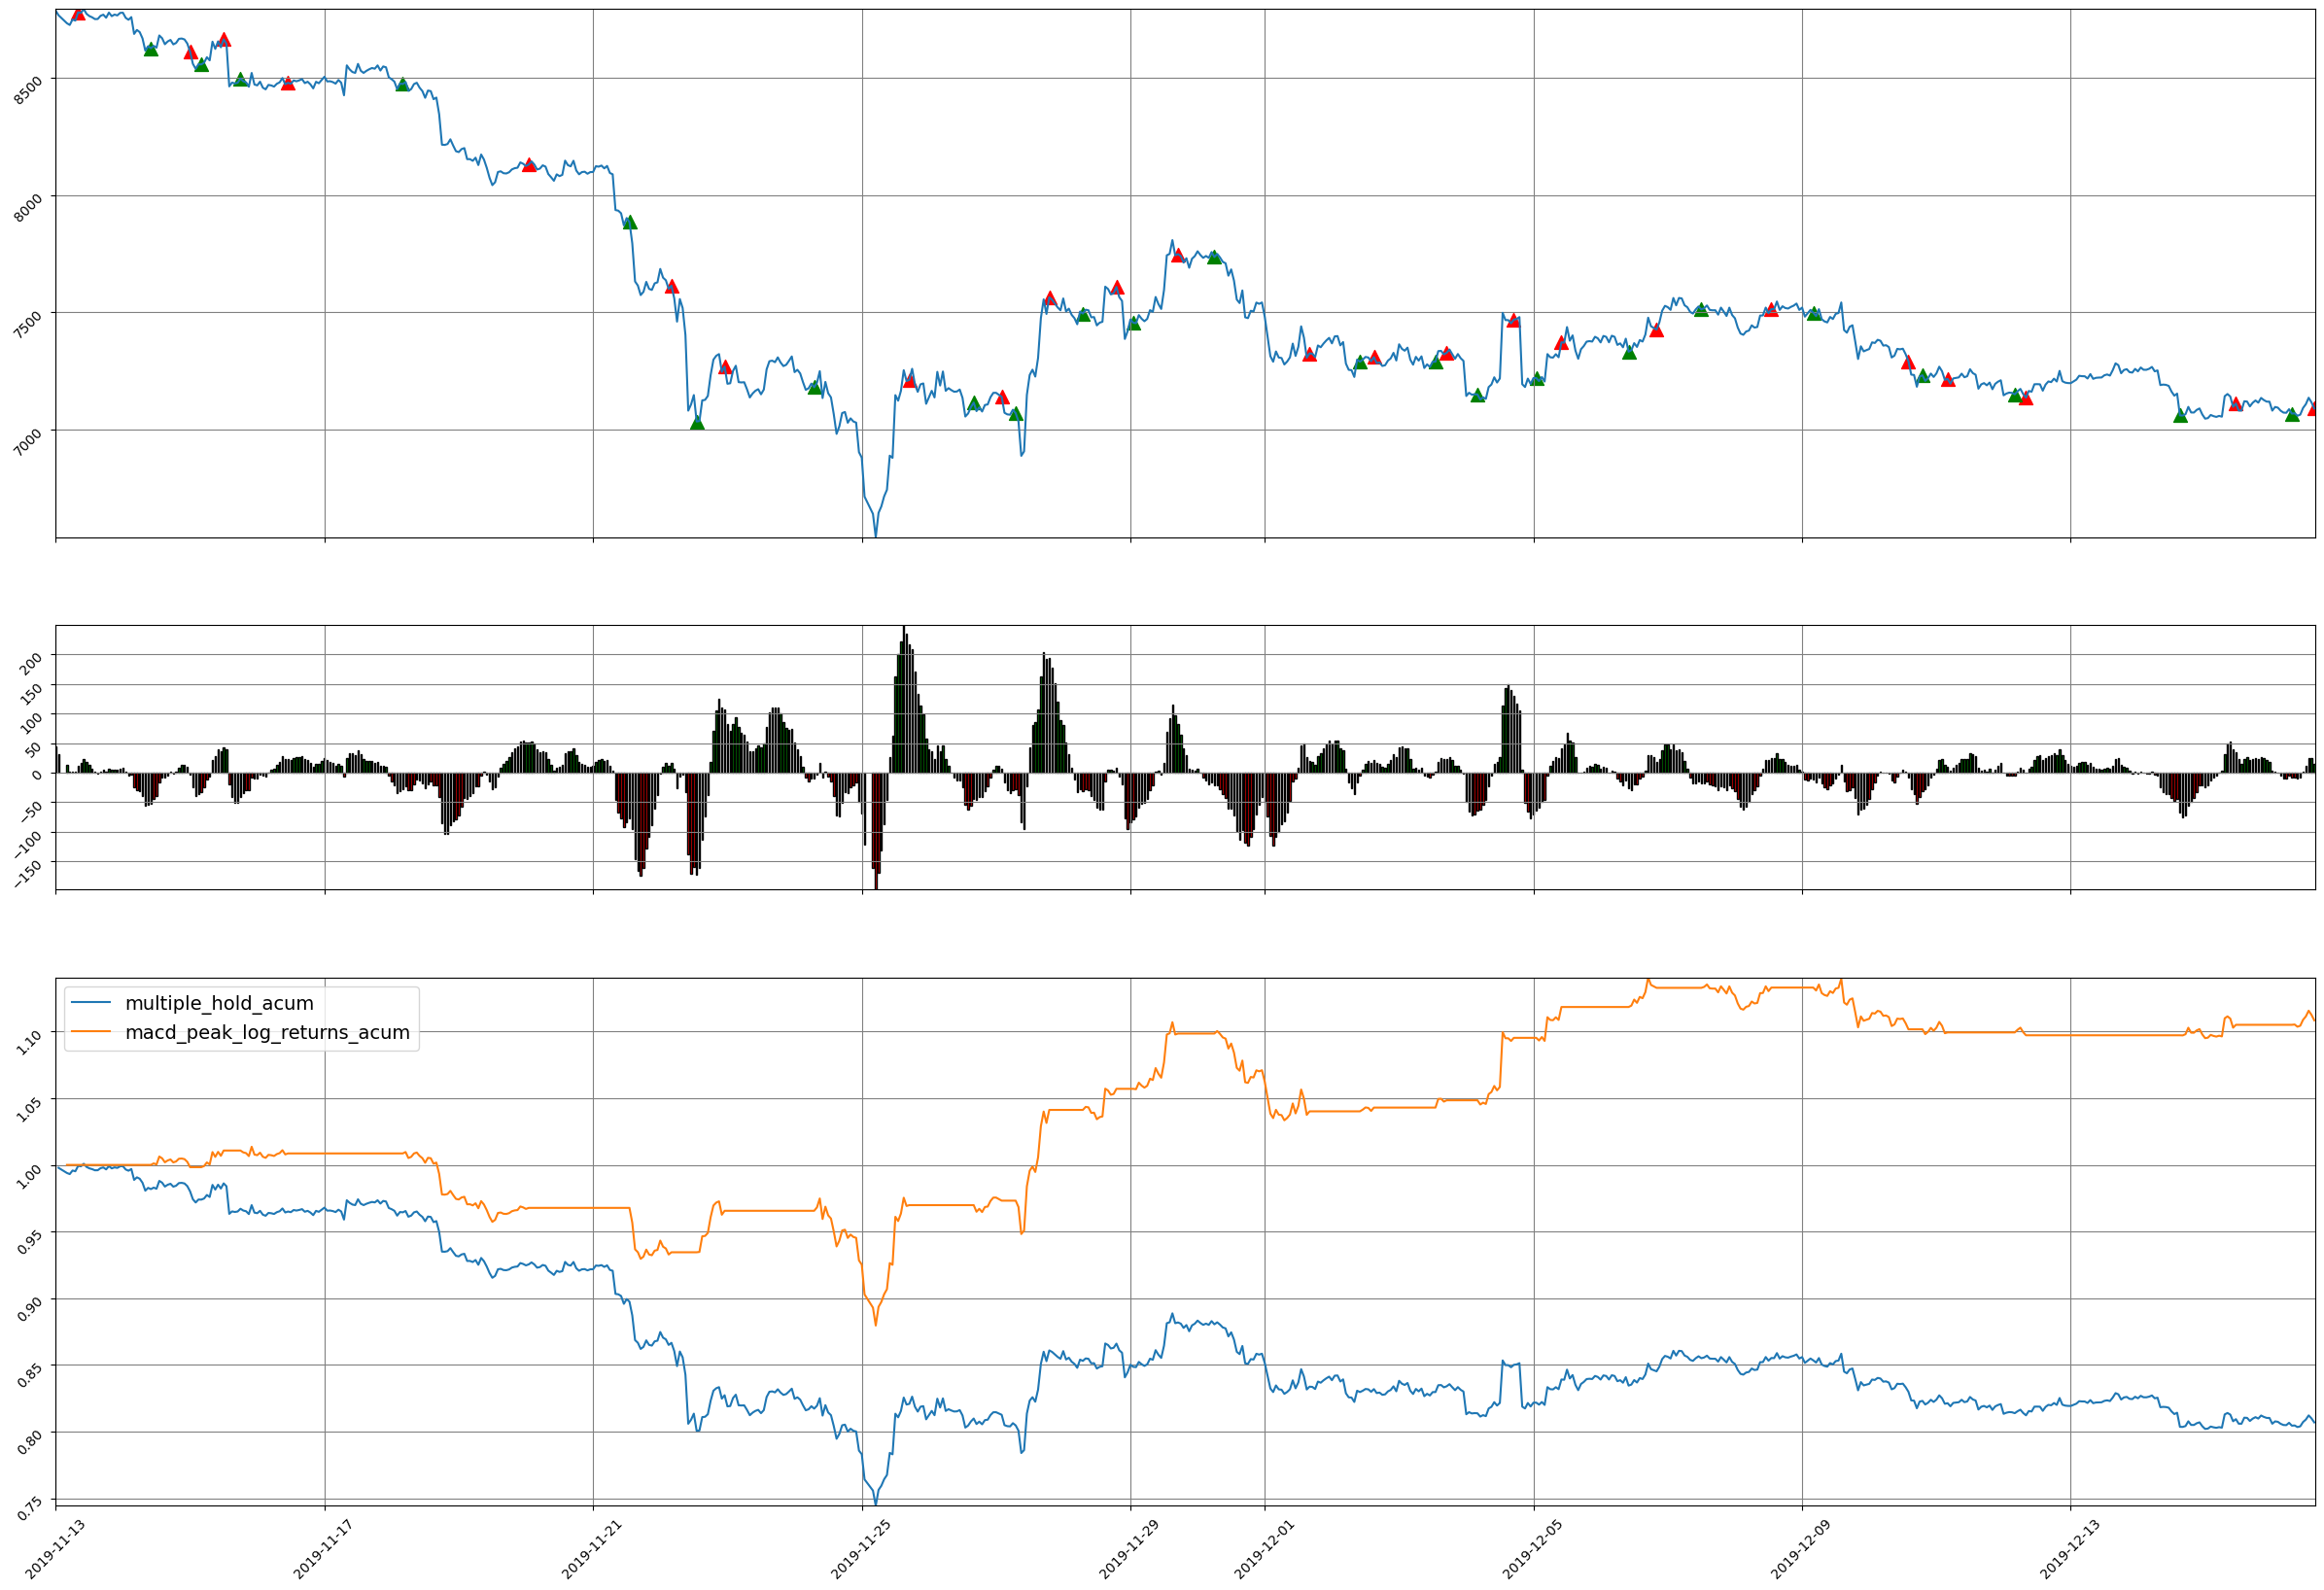

In [33]:
macd_peak_opt_j_1h.plot_backtest_results(start_plot='2019-11-13-00:00', end_plot='2019-12-17-00:00', width_bars=0.02)